In [1]:
# Unit 4 - "Keeping an Eye on Healthcare Costs" Lecture


# VIDEO 6

# Read in the data
Claims = read.csv("ClaimsData.csv")

str(Claims)

'data.frame':	458005 obs. of  16 variables:
 $ age              : int  85 59 67 52 67 68 75 70 67 67 ...
 $ alzheimers       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arthritis        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cancer           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ copd             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ depression       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ diabetes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ heart.failure    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ihd              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ kidney           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ osteoporosis     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stroke           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ reimbursement2008: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2008       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ reimbursement2009: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2009       : int  1 1 1 1 1 1 1 1 1 1 ...


In [2]:
# Percentage of patients in each cost bucket
table(Claims$bucket2009)/nrow(Claims)


          1           2           3           4           5 
0.671267781 0.190170413 0.089466272 0.043324855 0.005770679 

In [3]:
# Split the data
library(caTools)

set.seed(88)

spl = sample.split(Claims$bucket2009, SplitRatio = 0.6)

ClaimsTrain = subset(Claims, spl==TRUE)

ClaimsTest = subset(Claims, spl==FALSE)

In [4]:
# VIDEO 7

# Baseline method
table(ClaimsTest$bucket2009, ClaimsTest$bucket2008)

   
         1      2      3      4      5
  1 110138   7787   3427   1452    174
  2  16000  10721   4629   2931    559
  3   7006   4629   2774   1621    360
  4   2688   1943   1415   1539    352
  5    293    191    160    309    104

In [5]:
(110138 + 10721 + 2774 + 1539 + 104)/nrow(ClaimsTest)

[1] 0.6838135

In [6]:
# Penalty Matrix
PenaltyMatrix = matrix(c(0,1,2,3,4,2,0,1,2,3,4,2,0,1,2,6,4,2,0,1,8,6,4,2,0), byrow=TRUE, nrow=5)

PenaltyMatrix

0,1,2,3,4
2,0,1,2,3
4,2,0,1,2
6,4,2,0,1
8,6,4,2,0


In [7]:
# Penalty Error of Baseline Method
as.matrix(table(ClaimsTest$bucket2009, ClaimsTest$bucket2008))*PenaltyMatrix

sum(as.matrix(table(ClaimsTest$bucket2009, ClaimsTest$bucket2008))*PenaltyMatrix)/nrow(ClaimsTest)

   
        1     2     3     4     5
  1     0  7787  6854  4356   696
  2 32000     0  4629  5862  1677
  3 28024  9258     0  1621   720
  4 16128  7772  2830     0   352
  5  2344  1146   640   618     0

[1] 0.7386055

In [8]:
# VIDEO 8

# Load necessary libraries
library(rpart)
library(rpart.plot)

In [9]:
# CART model
ClaimsTree = rpart(bucket2009 ~ age + alzheimers + arthritis + cancer + copd + depression + diabetes + heart.failure + ihd + kidney + osteoporosis + stroke + bucket2008 + reimbursement2008, data=ClaimsTrain, method="class", cp=0.00005)


Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


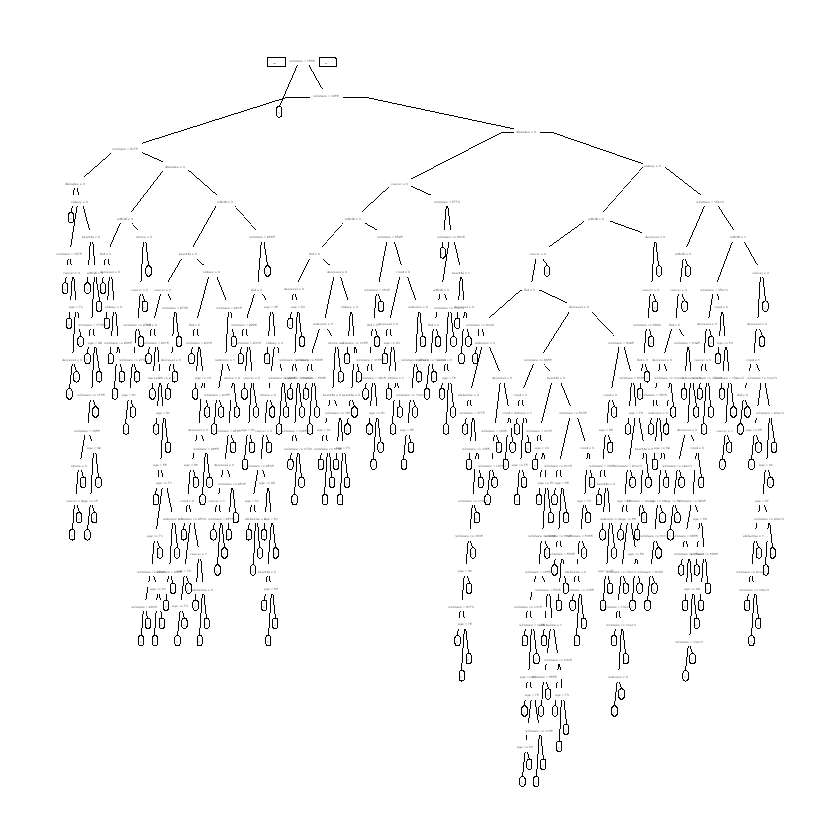

In [10]:
prp(ClaimsTree)

In [11]:
# Make predictions
PredictTest = predict(ClaimsTree, newdata = ClaimsTest, type = "class")

table(ClaimsTest$bucket2009, PredictTest)

   PredictTest
         1      2      3      4      5
  1 114141   8610    124    103      0
  2  18409  16102    187    142      0
  3   8027   8146    118     99      0
  4   3099   4584     53    201      0
  5    351    657      4     45      0

In [12]:
(114141 + 16102 + 118 + 201 + 0)/nrow(ClaimsTest)

[1] 0.7126669

In [13]:
# Penalty Error
as.matrix(table(ClaimsTest$bucket2009, PredictTest))*PenaltyMatrix

sum(as.matrix(table(ClaimsTest$bucket2009, PredictTest))*PenaltyMatrix)/nrow(ClaimsTest)

   PredictTest
        1     2     3     4     5
  1     0  8610   248   309     0
  2 36818     0   187   284     0
  3 32108 16292     0    99     0
  4 18594 18336   106     0     0
  5  2808  3942    16    90     0

[1] 0.7578902

In [14]:
# New CART model with loss matrix
ClaimsTree = rpart(bucket2009 ~ age + alzheimers + arthritis + cancer + copd + depression + diabetes + heart.failure + ihd + kidney + osteoporosis + stroke + bucket2008 + reimbursement2008, data=ClaimsTrain, method="class", cp=0.00005, parms=list(loss=PenaltyMatrix))

In [15]:
# Redo predictions and penalty error
PredictTest = predict(ClaimsTree, newdata = ClaimsTest, type = "class")

table(ClaimsTest$bucket2009, PredictTest)


   PredictTest
        1     2     3     4     5
  1 94310 25295  3087   286     0
  2  7176 18942  8079   643     0
  3  3590  7706  4692   401     1
  4  1304  3193  2803   636     1
  5   135   356   408   156     2

In [16]:
(94310 + 18942 + 4692 + 636 + 2)/nrow(ClaimsTest)

sum(as.matrix(table(ClaimsTest$bucket2009, PredictTest))*PenaltyMatrix)/nrow(ClaimsTest)

[1] 0.6472746

[1] 0.6418161